# Take Home Challenge - Relax Inc.

The   data   is   available   as   two   attached   CSV   files: *(1)takehome_user_engagement.csv*  / *(2)takehome_users.csv* 

The   data   has   the   following   two   tables: 
1. A   user   table   ( "takehome_users" )   with   data   on   12,000   users   who   signed   up   for   the  product   in   the   last   two   years.        This   table   includes:  
 * name:      the   user's   name  
 * object_id:      the   user's   id  
 * email:      email   address   
 * creation_source:      how   their   account   was   created.   This   takes   on   one  of   5   values:  
  * PERSONAL_PROJECTS:      invited   to   join   another   user's  personal   workspace  
  * GUEST_INVITE:      invited   to   an   organization   as   a   guest  (limited   permissions)  
  * ORG_INVITE:      invited   to   an   organization   (as   a   full   member)  
  * SIGNUP:      signed   up   via   the   website  
  * SIGNUP_GOOGLE_AUTH:      signed   up   using   Google  Authentication   (using   a   Google   email   account   for   their   login  id)  
 * creation_time:      when   they   created   their   account  
 * last_session_creation_time:      unix   timestamp   of   last   login  
 * opted_in_to_mailing_list:      whether   they   have   opted   into   receiving  marketing   emails  
 * enabled_for_marketing_drip:      whether   they   are   on   the   regular  marketing   email   drip  
 * org_id:      the   organization   (group   of   users)   they   belong   to  
 * invited_by_user_id:      which   user   invited   them   to   join   (if   applicable). 
 
2. A   usage   summary   table   ( "takehome_user_engagement" )   that   has   a   row   for   each   day  that   a   user   logged   into   the   product.   
 
 
Defining   an      "adopted   user"      as   a   user   who         has   logged   into   the   product   on   three   separate  days   in   at   least   one   seven­day   period  ,   identify   which   factors   predict   future   user  adoption  . 
We   suggest   spending   1­2   hours   on   this,   but   you're   welcome   to   spend   more   or   less.  Please   send   us   a   brief   writeup   of   your   findings   (the   more   concise,   the   better   ­­   no   more  than   one   page),   along   with   any   summary   tables,   graphs,   code,   or   queries   that   can   help  us   understand   your   approach.   Please   note   any   factors   you   considered   or   investigation  you   did,   even   if   they   did   not   pan   out.   Feel   free   to   identify   any   further   research   or   data  you   think   would   be   valuable.  

## Step 1 - Loading Data
** The objective in this section is to read the files in a effective way and import the libraries that we will use**

In [1]:
# Import the necessaries libraries for the code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import chardet

In [2]:
# Reading first of two datasets calling engag
engag = pd.read_csv("D:/DADOS USUARIO/Documents/springboard/take-home exercises/relax_challenge/takehome_user_engagement.csv",
                    parse_dates = [0],
                    infer_datetime_format = True)

In [3]:
# Taking a peek in engag which contains a row per day that user logged
engag.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
# Checking which encoding correspond to the second dataset
chardet.detect(open('D:/DADOS USUARIO/Documents/springboard/take-home exercises/relax_challenge/takehome_users.csv','rb').read())

{'confidence': 0.7298523315812625, 'encoding': 'ISO-8859-1', 'language': ''}

In [5]:
# Reading 2nd dataset calling users and specifying the encoding.
users = pd.read_csv("D:/DADOS USUARIO/Documents/springboard/take-home exercises/relax_challenge/takehome_users.csv",
                    encoding="ISO-8859-1",
                    index_col='object_id')

In [6]:
# Taking a peek in users which has numerous features describing users
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


## Step 2 - Cleaning Data
** The objective here is to make sure the variables and values are consistent **

In [7]:
# Having an overview of engag dataset
import pandas_profiling
pandas_profiling.ProfileReport(engag)

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Usuario\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Usuario\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Usuario\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().star

Number of variables,3
Number of observations,207917
Total Missing (%),0.0%
Total size in memory,4.8 MiB
Average record size in memory,24.0 B
Numeric,1
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,1


In [8]:
# Having an overview of users dataset
pandas_profiling.ProfileReport(users)

Number of variables,10
Number of observations,12000
Total Missing (%),7.3%
Total size in memory,937.6 KiB
Average record size in memory,80.0 B
Numeric,4
Categorical,4
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [9]:
# Convert unix timestamp to conventional time to better interpret the data
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'],unit='s')

In [10]:
# Correcting the type of creation_time to date
users.creation_time = pd.to_datetime(users.creation_time)

** Analysis of the loaded data: **
1. **engag:** This dataset is very long as it has 207.917 rows and few columns 3 variables, well technically 2 as one variable has a constant value of 1. Also no missing data reported. Not much work needed to clean and wrangle, we will leave the visited variable to perform time series analysis.
2. **users:** This dataset has a small size and not as many variables. The missing values for variable *invited_by_user_id* is of great proportion but we can understand that the missings are due to the reffered users that were not invited by any other user, so we will replace the missings with 0. The other variable presenting missing value is the *last_session_creation_time* it is also in high proportion **we should check if data from the engag dataset can fill those missings.**

In [69]:
# fill '0' if not invited by anyone
users = users['invited_by_user_id'].fillna(0, inplace=True)


In [11]:
# Calculating the number of missing values to be imputed
NaT = np.logical_not(users.last_session_creation_time.notnull())
NaT = NaT[NaT == True]
print("Number of missing values in users:", len(NaT))

# Filtering the last session of users
last_session = engag.groupby('user_id')['time_stamp'].max()
print("Number of missing users in engag :", len(users) - len(last_session))

# Cross checking imputation
print("Number of missings that can be imputed :", np.sum(NaT.index.isin(last_session.index)))

Number of missing values in users: 3177
Number of missing users in engag : 3177
Number of missings that can be imputed : 0


** Conclusion of Missing Values Imputation for *last_session_creation_time*:**
We see that the missing values from variable *last_session_creation_time* in dataset *users* are not available in the dataset *engag*, so we can´t perform imputation as planned. We will have to delete the rows with missing values before creating the model.

## Step 3 - Target Variable
** The objective is to calculate and create the target variable of the prediction model**

In [12]:
# For this problem the target variable have to be calculated, so let´s do that now
# There are two conditions, first, a user has to have logged into the product on three separate days...
adopted_users = engag.groupby('user_id')['visited'].count() > 2
adopted_users = adopted_users[adopted_users == True]
adopted_users = engag[engag['user_id'].isin(adopted_users.index)]

# and second, in at least one seven day period.
adopted_users = adopted_users.set_index('user_id')
adopted_users['lag1'] = adopted_users.groupby(['user_id'])['time_stamp'].shift()
adopted_users['lag2'] = adopted_users.groupby(['user_id'])['time_stamp'].shift(periods=2)
adopted_users['period'] = (adopted_users.time_stamp - adopted_users.lag1) + (adopted_users.lag1 - adopted_users.lag2)
adopted_users = adopted_users[adopted_users.period <= pd.Timedelta('7days')]
adopted_users = pd.unique(adopted_users.index)

# Numbers
print("Number of total users :", len(pd.unique(engag.user_id)))
print("Number of adopted users :", len(adopted_users))


Number of total users : 8823
Number of adopted users : 1656


In [13]:
print("Percent of adopted users from total users:", "%.1f" % round(len(adopted_users)/len(pd.unique(engag.user_id))*100,1), "%")

Percent of adopted users from total users: 18.8 %


In [14]:
# Add the target variable to both data frames
users["adopted_users"] = np.where(users.index.isin(adopted_users), 1, 0)
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


** Conclusion of Target Variable **

The target variable corresponds to 18,8% of the dataset making the data unbalanced, so we should considere balancing the data to improve prediction. Let´s keep that in mind!

## Step 4 - Explotatory Data Analysis
** The objective is to gain knowledge from the data in order to create a better prediction model in a very visual way **

### a) *engag*
This dataset requires a time series analysis to understand  how the product developed over time and  how that affected users adoption

In [15]:
# Prepare data to see product's visitation
ts_e = engag.set_index('time_stamp')
ts_e['adopted'] = ts_e.user_id.isin(adopted_users).astype(int)
ts_e = ts_e.sort_index()
ts_e = ts_e.drop('user_id', axis=1)

Text(0,0.5,'# logins')

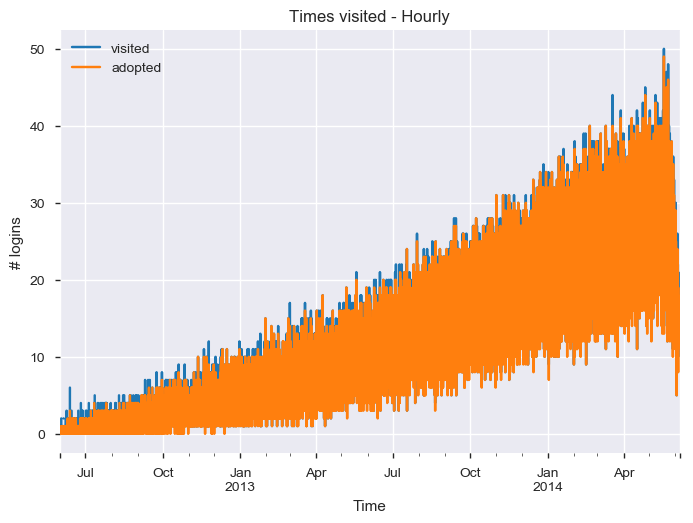

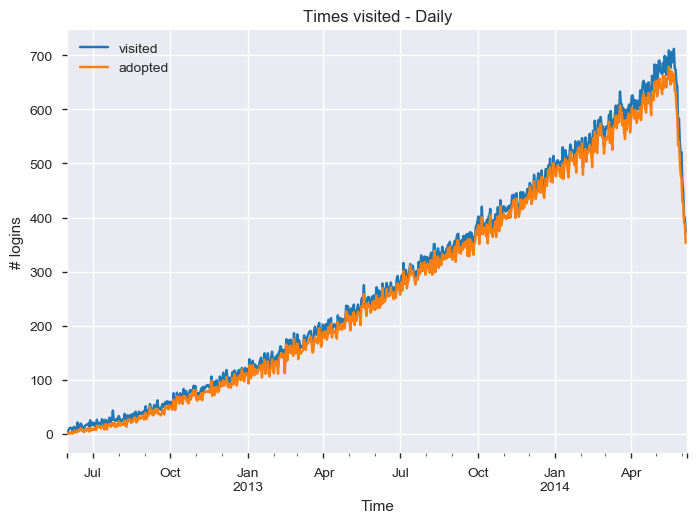

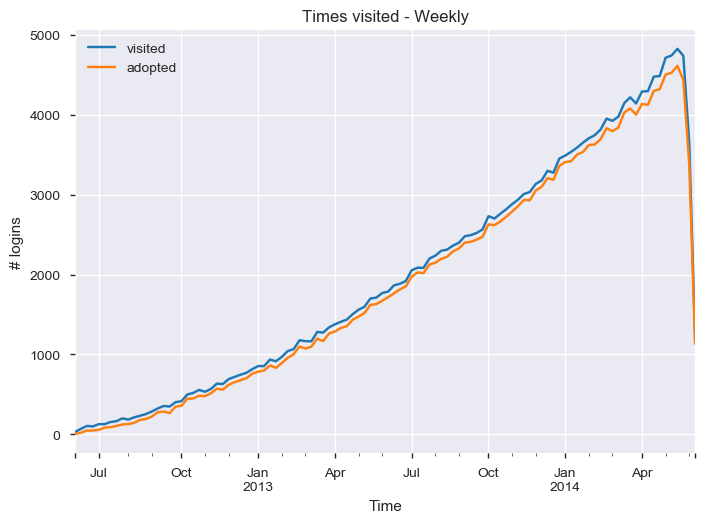

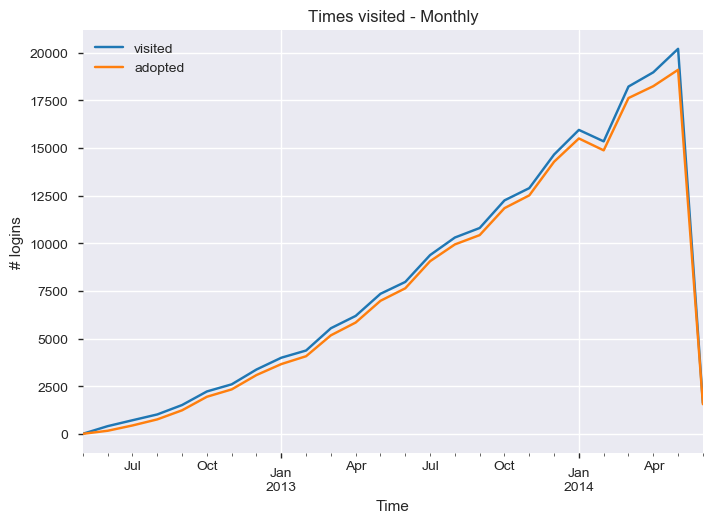

In [16]:
# Creating different frequencies
ts_e_H = ts_e.resample('H', label = 'right').sum()
ts_e_D = ts_e.resample('D', label = 'right').sum()
ts_e_W = ts_e.resample('W', label = 'right').sum()
ts_e_M = ts_e.resample('M', label = 'right').sum()

# Generating plots
ts_e_H.plot()
plt.title("Times visited - Hourly")
plt.xlabel("Time")
plt.ylabel("# logins")

ts_e_D.plot()
plt.title("Times visited - Daily")
plt.xlabel("Time")
plt.ylabel("# logins")

ts_e_W.plot()
plt.title("Times visited - Weekly")
plt.xlabel("Time")
plt.ylabel("# logins")

ts_e_M.plot()
plt.title("Times visited - Monthly")
plt.xlabel("Time")
plt.ylabel("# logins")

** Analysis of Time series of adopters and non-adopters **

We can see how the times series behaves on different frequencies on the 4 plots. There is clearly a up trend on the plots, followed by a strong fall after mid april. Total visitation and adopted users visitation apparently have the same pattern, however on the monthly plot it is possible to see the curves distancing themselves, as the orange line does not reach the same peak as the blue

** Actions: We should detrend the data to see if we can find internal patterns**

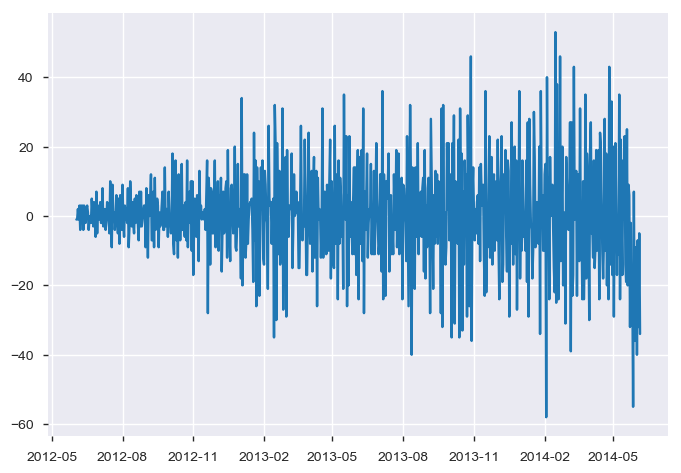

In [75]:
# Detrend by taking the difference from 1 period
ts_e_D_diff = ts_e_D - ts_e_D.shift()
plt.plot(ts_e_D_diff)

Now that the time series is detrended and closer to stationary we can check with there is self correlation.

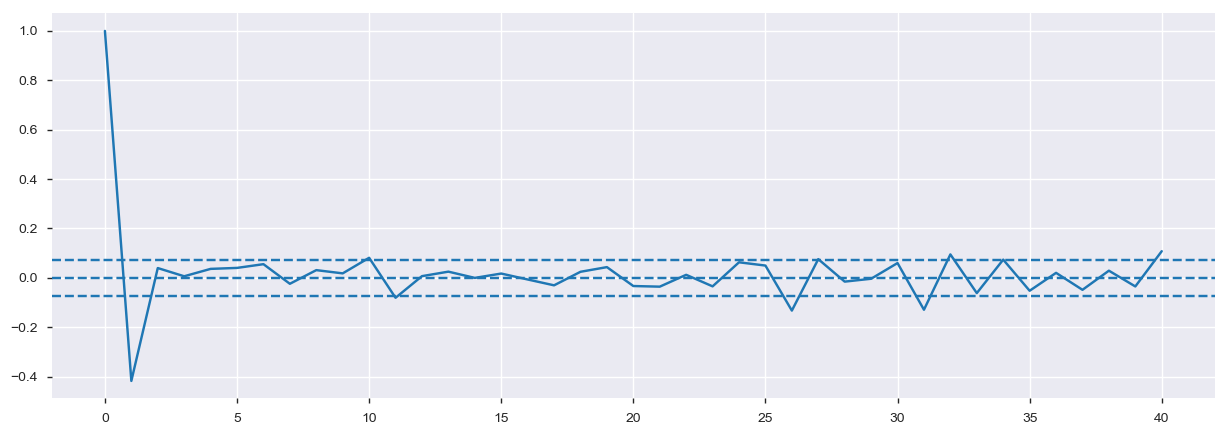

In [62]:
# Plot self correlation 
from statsmodels.tsa import stattools
acf_result = stattools.acf(ts_e_D_diff.fillna(0))
plt.figure(figsize=(15,5))
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(ts_e_D_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(ts_e_D_diff)),linestyle='--')

** Conclusion for Self Correlation **

In the chart we see that at period 0 correlation is 1, as no lag is performed. At period 1, or with the diference of 1 day we see a significant correlation of -0.4. This means that if a person logged in the product the previous day there it is unlikely that she will log again the next day. For the other periods there are no significant corelation.

** Actions: We should look into creating an ARIMA prediction model of Autoregressive of 1 period **

### b) *users*
This dataset can show how the different users related variable can affect adoption

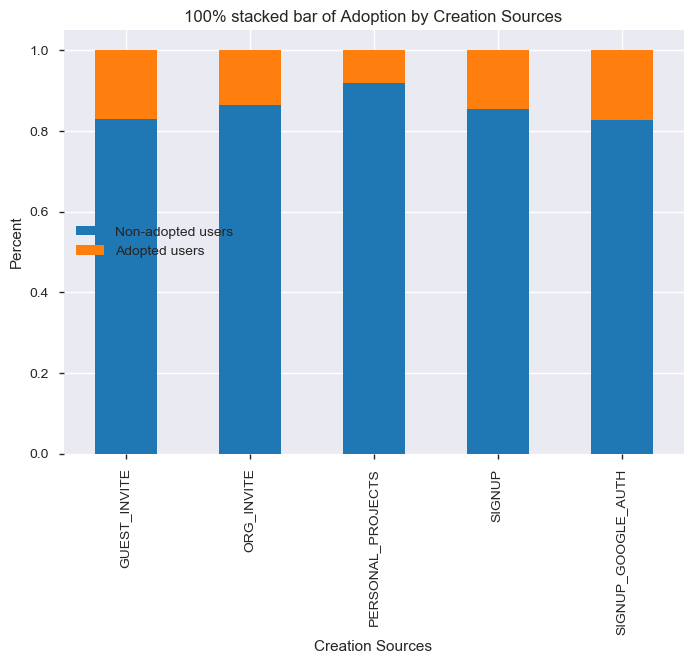

In [20]:
# Plot sdoption versus different creation sources
users['count']=1
pvt = users.pivot_table(values=['count'],
                 index='creation_source',
                 columns='adopted_users',
                 aggfunc='sum')

pvt = pvt.div(pvt.sum(1), axis=0)
pvt.plot(kind='bar', stacked=True)
plt.title('100% stacked bar of Adoption by Creation Sources')
plt.xlabel("Creation Sources")
plt.ylabel("Percent")
plt.legend(['Non-adopted users','Adopted users'], loc='center left')

On this plot we can see that dependeing on were is your creation source there is an efect on wether or not the user will became an adopted user, we cant see serves as a threshold so this variable might help improve the model but won´t be decisive.

## Step 5 - Prediction Model
** The objective is to create a model that predicts  **

### a) ARIMA model

As we have seen that the time series relates to itself significantly we will use a time series forecasting method

In [26]:
# Import ARIMA library
from statsmodels.tsa.arima_model import ARIMA

In [45]:
# Adjusting input data as it requires to be stationary
ts = ts_e_D.adopted - ts_e_D.adopted.shift()
ts = ts.dropna()

Text(0.5,1,'RSS: nan')

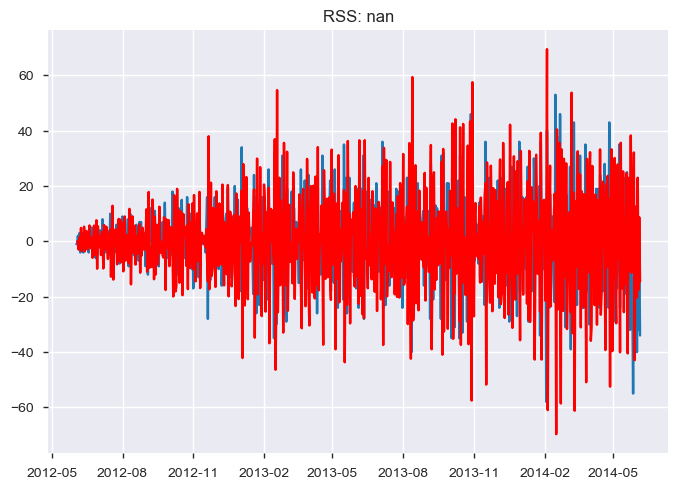

In [48]:
# AR model, of 1 period without moving average
model = ARIMA(ts, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts)**2))

In [76]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

Text(0,0.5,'# logins')

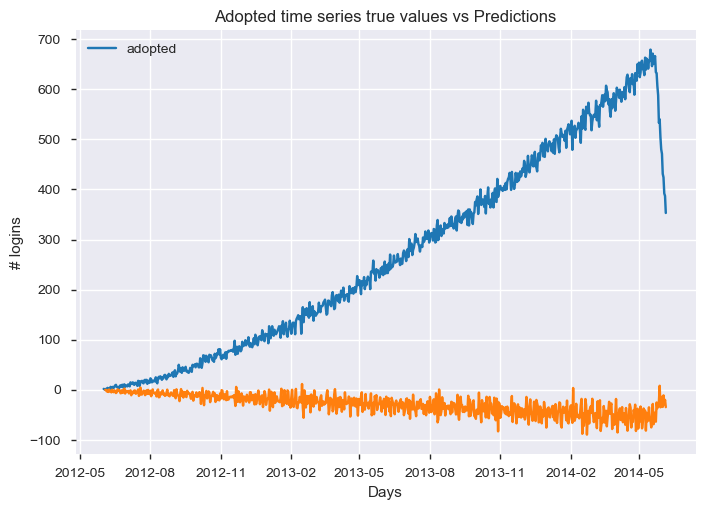

In [80]:
plt.plot(ts_e_D.adopted)
plt.plot(predictions_ARIMA_diff_cumsum)
plt.legend()
plt.title("Adopted time series true values vs Predictions")
plt.xlabel("Days")
plt.ylabel("# logins")

** Conclusion of ARIMA model **

The prediction looks like it was able to catch the internal pattern of the adopted time series, showing slightly higher variance. However we haven´t added the trend back, so furter invesigation on how to do that is next step when more time is available.
Responding to the proposed question of which factors affect future adoption, the time series of adoption could affect future adoption.

### b)  Desicion Tree classifier model

Even though time has a high affect on the adoption we can frame as a supervised learning problem ad decompose time

In [21]:
# Decompose the time variables
users['day_ct'] = users.creation_time.dt.day
users['month_ct'] = users.creation_time.dt.month
users['dow_ct'] = users.creation_time.dt.dayofweek
users['hour_ct'] = users.creation_time.dt.hour

users['day_lsct'] = users.last_session_creation_time.dt.day
users['month_lsct'] = users.last_session_creation_time.dt.month
users['dow_lsct'] = users.last_session_creation_time.dt.dayofweek
users['hour_lsct'] = users.last_session_creation_time.dt.hour

In [22]:
# Adjusting input variables
x = users.reset_index()
x = x.drop(['name',
                'email',
                'count',
                'object_id',
                'creation_time',
                'last_session_creation_time'], axis=1)

# mapping creation source to integers
creation = {'PERSONAL_PROJECTS': 1,
            'GUEST_INVITE': 2,
            'ORG_INVITE': 3,
            'SIGNUP': 4,
            'SIGNUP_GOOGLE_AUTH': 5}
x['creation_source'] = x['creation_source'].map(lambda x: creation[x])


# drop null rows, just for sanity check
x.dropna(axis=0, inplace=True)


In [23]:
# Separating the output variable from the input variables
y = x['adopted_users']
x = x.drop('adopted_users', axis=1)

In [24]:
# import libraries for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn import decomposition

In [25]:
# 70% train and 30% test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
tree = DecisionTreeClassifier()


tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

# scores
print('=====Feature importance=======')
for idx, val in enumerate(tree.feature_importances_):
    print("{:30}{:3f}".format(x.columns[idx], val))
print('-----------------------------------------------')

print("{:30}{:3f}".format('F1 score', f1_score(y_test, y_pred)))
print("{:30}{:3f}".format('Test accuracy', accuracy_score(y_test, y_pred)))
print()

print('====Confusion Matrix=====')
print(confusion_matrix(y_test, y_pred))

=====Feature importance=======
creation_source               0.010273
opted_in_to_mailing_list      0.003306
enabled_for_marketing_drip    0.001301
org_id                        0.028289
invited_by_user_id            0.029428
day_ct                        0.179430
month_ct                      0.376404
dow_ct                        0.010589
hour_ct                       0.016575
day_lsct                      0.139608
month_lsct                    0.170529
dow_lsct                      0.020879
hour_lsct                     0.013388
-----------------------------------------------
F1 score                      0.806876
Test accuracy                 0.927843

====Confusion Matrix=====
[[2057   93]
 [  98  399]]


# Conclusion

The leading factor for adoption is the month of creation, followed by day of creation, month and day of last session. Then at a small fraction we see invited by user and org_id.

To improve the model the reccomended acions are gather more data, investigate depper time series, balance th data set, perform social network analysis on invitation by user.